In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime
from scipy.stats import mode

In [148]:
n = 27200000 #number of records in file
s = 250000 #desired sample size
filename = 'nyc_bikeshare.csv'
skip = sorted(random.sample(range(n),n-s))
skip.pop(0)

0

In [149]:
df1 = pd.read_csv(filename, skiprows=skip)

In [150]:
df1

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
0,97,06-01-13 00:44:23,06-01-13 00:46:00,244.0,354.0,17844,1.0,1984.0,1
1,1052,06-01-13 09:45:25,06-01-13 10:02:57,217.0,398.0,19382,0.0,NaN,0
2,1613,06-01-13 10:47:01,06-01-13 11:13:54,306.0,348.0,17493,1.0,1979.0,2
3,210,06-01-13 12:00:32,06-01-13 12:04:02,493.0,520.0,17218,1.0,1982.0,1
4,358,06-01-13 12:11:28,06-01-13 12:17:26,466.0,482.0,17237,1.0,1979.0,1
...,...,...,...,...,...,...,...,...,...
265332,665,11-30-19 23:58:27,12-01-19 00:09:32,3711.0,442.0,40402,1.0,1992.0,1
265333,265,11-30-19 23:58:46,12-01-19 00:03:12,116.0,462.0,39333,1.0,1995.0,1
265334,192,11-30-19 23:58:49,12-01-19 00:02:01,503.0,297.0,15543,1.0,1966.0,2
265335,534,11-30-19 23:59:07,12-01-19 00:08:01,251.0,302.0,33020,1.0,1996.0,2


In [151]:
df1['starttime'] = pd.to_datetime(df1['starttime'])
df1['stoptime'] = pd.to_datetime(df1['stoptime'])
df1.dtypes

tripduration                 int64
starttime           datetime64[ns]
stoptime            datetime64[ns]
start_station_id           float64
end_station_id             float64
bikeid                       int64
usertype                   float64
birthyear                  float64
gender                       int64
dtype: object

In [152]:
df1

,tripduration,starttime,stoptime,start_station_id,end_station_id,bikeid,usertype,birthyear,gender
0,97,2013-06-01 00:44:23,2013-06-01 00:46:00,244.0,354.0,17844,1.0,1984.0,1
1,1052,2013-06-01 09:45:25,2013-06-01 10:02:57,217.0,398.0,19382,0.0,NaN,0
2,1613,2013-06-01 10:47:01,2013-06-01 11:13:54,306.0,348.0,17493,1.0,1979.0,2
3,210,2013-06-01 12:00:32,2013-06-01 12:04:02,493.0,520.0,17218,1.0,1982.0,1
4,358,2013-06-01 12:11:28,2013-06-01 12:17:26,466.0,482.0,17237,1.0,1979.0,1
...,...,...,...,...,...,...,...,...,...
265332,665,2019-11-30 23:58:27,2019-12-01 00:09:32,3711.0,442.0,40402,1.0,1992.0,1
265333,265,2019-11-30 23:58:46,2019-12-01 00:03:12,116.0,462.0,39333,1.0,1995.0,1
265334,192,2019-11-30 23:58:49,2019-12-01 00:02:01,503.0,297.0,15543,1.0,1966.0,2
265335,534,2019-11-30 23:59:07,2019-12-01 00:08:01,251.0,302.0,33020,1.0,1996.0,2


In [153]:
df1['date_minus_time'] = df1["starttime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df1.set_index(df1["date_minus_time"], inplace=True)

In [154]:
resampled_df = pd.DataFrame()
resampled_df['tripduration'] = df1['tripduration'].resample('D').mean()
resampled_df['birthyear'] = df1['birthyear'].resample('D').mean()
resampled_df['gender'] = df1['gender'].resample('D').mean() #mode()
resampled_df['usertype'] = df1['usertype'].resample('D').mean()
resampled_df['tripcnt'] = df1['tripduration'].resample('D').count()

In [155]:
resampled_df = resampled_df.dropna()
date_before_limit = pd.Timestamp(2019, 11, 27)
resampled_df = resampled_df[resampled_df.index < date_before_limit]
resampled_df

,tripduration,birthyear,gender,usertype,tripcnt
date_minus_time,,,,,
2013-06-01,2030.000000,1974.833333,0.722222,0.666667,18
2013-06-02,1877.470588,1975.642857,0.352941,0.274510,51
2013-06-03,1235.125000,1971.272727,0.541667,0.458333,24
2013-06-04,2590.036364,1975.105263,0.909091,0.690909,55
2013-06-05,1228.921569,1978.200000,0.568627,0.490196,51
...,...,...,...,...,...
2019-11-22,963.258065,1981.000000,1.148387,0.935484,155
2019-11-23,1923.972477,1980.889908,1.266055,0.935780,109
2019-11-24,727.901961,1980.254902,1.098039,0.882353,51


In [156]:
date_before = pd.Timestamp(2013, 12, 27)
df2013 = resampled_df[resampled_df.index < date_before]

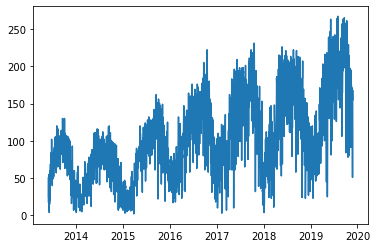

In [157]:
plt.plot(resampled_df.index, resampled_df['tripcnt'])

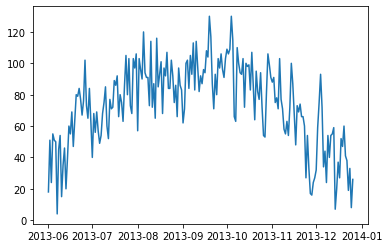

In [158]:
plt.plot(df2013.index, df2013['tripcnt'])

In [159]:
df_monthly = pd.DataFrame()
df_monthly['tripduration'] = resampled_df['tripduration'].resample('M').mean()
df_monthly['birthyear'] = resampled_df['birthyear'].resample('M').mean()
df_monthly['gender'] = resampled_df['gender'].resample('M').mean() #mode()
df_monthly['usertype'] = resampled_df['usertype'].resample('M').mean()
df_monthly['tripcnt'] = resampled_df['tripcnt'].resample('M').sum()
df_monthly

,tripduration,birthyear,gender,usertype,tripcnt
date_minus_time,,,,,
2013-06-30,1242.228992,1974.138182,0.705687,0.588230,1652
2013-07-31,1028.168812,1975.703066,0.955064,0.770988,2325
2013-08-31,1003.077504,1975.904308,0.993770,0.800637,2767
2013-09-30,874.806042,1975.329283,1.051243,0.843807,2862
2013-10-31,819.098471,1975.221286,1.122726,0.901247,2810
...,...,...,...,...,...
2019-07-31,939.355518,1980.500507,1.151839,0.814796,5968
2019-08-31,950.679028,1980.893606,1.145018,0.799383,6236
2019-09-30,1072.369186,1980.970126,1.164063,0.820781,6616


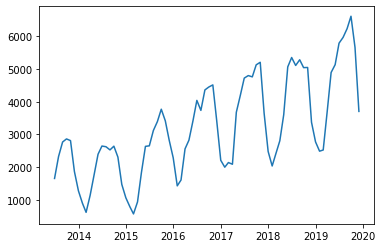

In [160]:
plt.plot(df_monthly.index, df_monthly['tripcnt'])

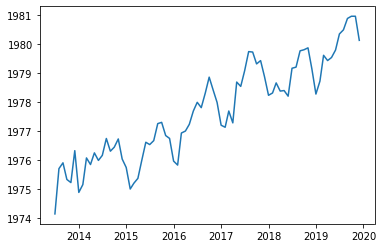

In [161]:
plt.plot(df_monthly.index, df_monthly['birthyear'])

In [162]:
beg2014 = pd.Timestamp(2013, 12, 31)
end2014 = pd.Timestamp(2015, 1, 1)
monthly2014 = df_monthly[df_monthly.index < end2014]
monthly2014 = monthly2014[monthly2014.index > beg2014]

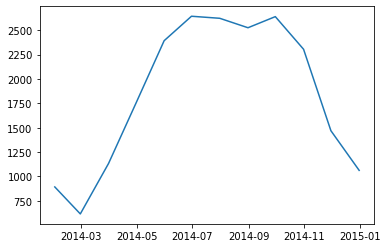

In [163]:
plt.plot(monthly2014.index, monthly2014['tripcnt'])

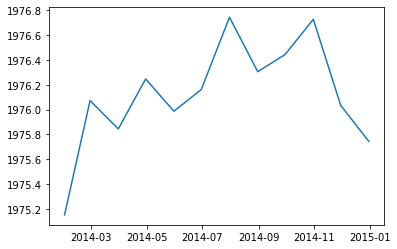

In [164]:
plt.plot(monthly2014.index, monthly2014['birthyear'])

In [165]:
nyellow = 8000000 #number of records in file
filename = 'nyc_yellow_taxi.csv'
skip = sorted(random.sample(range(nyellow),nyellow-s))
skip.pop(0)

0

In [166]:
df_yel = pd.read_csv(filename, skiprows=skip)

In [167]:
df_yel

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_location_id,dropoff_location_id,total_amount
0,06-13-13 18:18:00,06-13-13 18:30:00,1,0.71,-73.986460,40.750052,-73.979160,40.752502,NaN,NaN,10.00
1,06-04-13 17:57:22,06-04-13 18:07:14,1,1.50,-74.002796,40.760595,-73.983106,40.764573,NaN,NaN,11.00
2,06-19-13 20:51:00,06-19-13 21:03:00,1,2.01,-73.995972,40.740307,-73.976535,40.752057,NaN,NaN,12.50
3,06-29-13 01:08:30,06-29-13 01:15:59,4,2.20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,12.00
4,06-24-13 09:26:37,06-24-13 09:47:01,1,2.10,-73.999320,40.761202,-73.970847,40.753693,NaN,NaN,16.80
...,...,...,...,...,...,...,...,...,...,...,...
264307,06-14-19 11:44:21,06-14-19 11:56:46,2,1.30,NaN,NaN,NaN,NaN,170.0,113.0,12.30
264308,06-09-19 07:38:15,06-09-19 07:51:56,1,4.40,NaN,NaN,NaN,NaN,263.0,113.0,20.47
264309,06-20-19 07:25:00,06-20-19 07:37:25,1,2.85,NaN,NaN,NaN,NaN,236.0,161.0,15.88
264310,06-12-19 22:46:24,06-12-19 22:53:39,1,1.42,NaN,NaN,NaN,NaN,114.0,170.0,13.50


In [168]:
df_yel['pickup_datetime'] = pd.to_datetime(df_yel['pickup_datetime'])
df_yel['dropoff_datetime'] = pd.to_datetime(df_yel['dropoff_datetime'])
df_yel.dtypes

pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
trip_distance                 float64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
pickup_location_id            float64
dropoff_location_id           float64
total_amount                  float64
dtype: object

In [169]:
df_yel['date_minus_time'] = df_yel["pickup_datetime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df_yel.set_index(df_yel["date_minus_time"], inplace=True)

In [170]:
resampled_df_yel = pd.DataFrame()
resampled_df_yel['total_amount'] = df_yel['total_amount'].resample('D').mean()
resampled_df_yel['trip_distance'] = df_yel['trip_distance'].resample('D').mean()
resampled_df_yel['tripcnt_taxi'] = df_yel['total_amount'].resample('D').count()

In [171]:
resampled_df_yel

,total_amount,trip_distance,tripcnt_taxi
date_minus_time,,,
2013-06-01,13.526420,2.756534,176
2013-06-02,13.811901,2.846761,142
2013-06-03,14.331489,2.884397,141
2013-06-04,15.352015,2.728284,134
2013-06-05,13.958437,2.395875,160
...,...,...,...
2019-06-26,21.037475,3.115836,598
2019-06-27,20.353872,2.986635,532
2019-06-28,20.611706,3.074966,592


In [172]:
resampled_df

,tripduration,birthyear,gender,usertype,tripcnt
date_minus_time,,,,,
2013-06-01,2030.000000,1974.833333,0.722222,0.666667,18
2013-06-02,1877.470588,1975.642857,0.352941,0.274510,51
2013-06-03,1235.125000,1971.272727,0.541667,0.458333,24
2013-06-04,2590.036364,1975.105263,0.909091,0.690909,55
2013-06-05,1228.921569,1978.200000,0.568627,0.490196,51
...,...,...,...,...,...
2019-11-22,963.258065,1981.000000,1.148387,0.935484,155
2019-11-23,1923.972477,1980.889908,1.266055,0.935780,109
2019-11-24,727.901961,1980.254902,1.098039,0.882353,51


In [173]:
df_yel_bike = pd.concat([resampled_df, resampled_df_yel], axis=1, join='inner')

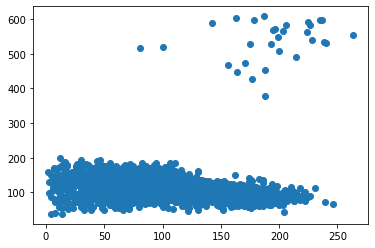

In [174]:
plt.plot(df_yel_bike['tripcnt'], df_yel_bike['tripcnt_taxi'], 'o')

In [175]:
df_yel_bike = df_yel_bike[df_yel_bike['tripcnt_taxi'] < 200]

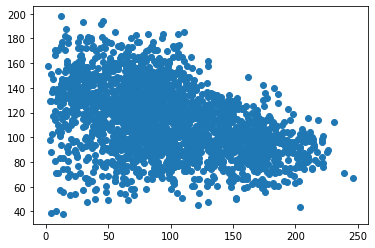

In [176]:
plt.plot(df_yel_bike['tripcnt'], df_yel_bike['tripcnt_taxi'], 'o')

In [177]:
cor = df_yel_bike['tripcnt'].corr(df_yel_bike['tripcnt_taxi'], 'pearson')

In [178]:
cor

-0.41005656719707556

In [179]:
ngreen = 3800000 #number of records in file
filename = 'nyc_green_taxi.csv'
skip = sorted(random.sample(range(ngreen),ngreen-s))
skip.pop(0)

0

In [180]:
df_gr = pd.read_csv(filename, skiprows=skip)

In [181]:
df_gr

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_location_id,dropoff_location_id,total_amount,trip_type
0,08-28-13 19:58:28,08-28-13 20:05:00,1,1.05,-73.920326,40.757439,-73.909798,40.769817,NaN,NaN,7.50,NaN
1,08-17-13 09:36:29,08-17-13 09:37:16,5,0.26,-73.850716,40.687580,-73.850273,40.690495,NaN,NaN,3.50,NaN
2,08-19-13 07:59:12,08-19-13 08:05:32,5,1.11,-73.958336,40.815311,-73.936378,40.808487,NaN,NaN,8.00,NaN
3,08-23-13 18:58:06,08-23-13 18:59:48,1,0.00,-73.918137,40.866261,-73.918167,40.866268,NaN,NaN,7.50,NaN
4,08-25-13 19:13:58,08-25-13 19:37:28,6,5.35,-73.924126,40.743977,-74.003029,40.725677,NaN,NaN,24.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
275654,06-06-19 15:26:11,06-06-19 15:37:58,1,3.20,NaN,NaN,NaN,NaN,129.0,138.0,12.30,1.0
275655,06-15-19 22:45:07,06-15-19 23:03:23,2,4.00,NaN,NaN,NaN,NaN,181.0,255.0,17.80,1.0
275656,06-29-19 16:42:47,06-29-19 17:03:05,1,4.49,NaN,NaN,NaN,NaN,196.0,7.0,18.30,1.0
275657,06-06-19 18:42:22,06-06-19 18:53:00,1,2.30,NaN,NaN,NaN,NaN,40.0,257.0,11.30,1.0


In [182]:
df_gr['pickup_datetime'] = pd.to_datetime(df_gr['pickup_datetime'])
df_gr['dropoff_datetime'] = pd.to_datetime(df_gr['dropoff_datetime'])
df_gr.dtypes

pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
trip_distance                 float64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
pickup_location_id            float64
dropoff_location_id           float64
total_amount                  float64
trip_type                     float64
dtype: object

In [183]:
df_gr['date_minus_time'] = df_gr["pickup_datetime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df_gr.set_index(df_gr["date_minus_time"], inplace=True)

In [184]:
resampled_df_gr = pd.DataFrame()
resampled_df_gr['total_amount_gr'] = df_gr['total_amount'].resample('D').mean()
resampled_df_gr['trip_distance_gr'] = df_gr['trip_distance'].resample('D').mean()
resampled_df_gr['tripcnt_gr'] = df_gr['total_amount'].resample('D').count()

In [185]:
resampled_df_gr

,total_amount_gr,trip_distance_gr,tripcnt_gr
date_minus_time,,,
2008-12-31,6.300000,1.000000,1
2009-01-01,8.300000,1.550000,1
2009-01-02,NaN,NaN,0
2009-01-03,NaN,NaN,0
2009-01-04,NaN,NaN,0
...,...,...,...
2019-06-26,16.194656,2.871765,799
2019-06-27,16.157859,2.806136,766
2019-06-28,16.280272,2.935601,882


In [186]:
df_yel_gr_bike = pd.concat([df_yel_bike, resampled_df_gr], axis=1, join='inner')
df_yel_gr_bike

,tripduration,birthyear,gender,usertype,tripcnt,total_amount,trip_distance,tripcnt_taxi,total_amount_gr,trip_distance_gr,tripcnt_gr
date_minus_time,,,,,,,,,,,
2013-06-01,2030.000000,1974.833333,0.722222,0.666667,18,13.526420,2.756534,176,NaN,NaN,0
2013-06-02,1877.470588,1975.642857,0.352941,0.274510,51,13.811901,2.846761,142,NaN,NaN,0
2013-06-03,1235.125000,1971.272727,0.541667,0.458333,24,14.331489,2.884397,141,NaN,NaN,0
2013-06-04,2590.036364,1975.105263,0.909091,0.690909,55,15.352015,2.728284,134,NaN,NaN,0
2013-06-05,1228.921569,1978.200000,0.568627,0.490196,51,13.958437,2.395875,160,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,1072.112745,1979.632353,1.127451,0.656863,204,18.870909,3.282727,44,15.441184,3.010921,76
2019-05-28,665.101351,1979.155405,1.209459,0.952703,148,21.034328,3.414179,67,14.981532,2.748108,111
2019-05-29,698.762963,1979.562963,1.222222,0.918519,135,18.344875,2.636125,80,17.183303,3.234404,109


In [187]:
df_yel_gr_bike['tripcnt_taxi'] += df_yel_gr_bike['tripcnt_gr']
df_yel_gr_bike

,tripduration,birthyear,gender,usertype,tripcnt,total_amount,trip_distance,tripcnt_taxi,total_amount_gr,trip_distance_gr,tripcnt_gr
date_minus_time,,,,,,,,,,,
2013-06-01,2030.000000,1974.833333,0.722222,0.666667,18,13.526420,2.756534,176,NaN,NaN,0
2013-06-02,1877.470588,1975.642857,0.352941,0.274510,51,13.811901,2.846761,142,NaN,NaN,0
2013-06-03,1235.125000,1971.272727,0.541667,0.458333,24,14.331489,2.884397,141,NaN,NaN,0
2013-06-04,2590.036364,1975.105263,0.909091,0.690909,55,15.352015,2.728284,134,NaN,NaN,0
2013-06-05,1228.921569,1978.200000,0.568627,0.490196,51,13.958437,2.395875,160,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,1072.112745,1979.632353,1.127451,0.656863,204,18.870909,3.282727,120,15.441184,3.010921,76
2019-05-28,665.101351,1979.155405,1.209459,0.952703,148,21.034328,3.414179,178,14.981532,2.748108,111
2019-05-29,698.762963,1979.562963,1.222222,0.918519,135,18.344875,2.636125,189,17.183303,3.234404,109


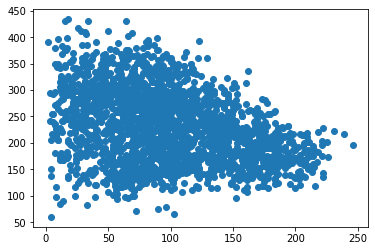

In [188]:
plt.plot(df_yel_gr_bike['tripcnt'], df_yel_gr_bike['tripcnt_taxi'], 'o')

In [189]:
cor_yg = df_yel_gr_bike['tripcnt'].corr(df_yel_gr_bike['tripcnt_taxi'], 'pearson')

In [190]:
cor_yg

-0.34229327125754855

In [191]:
nrideshare = 16000000 #number of records in file
filename = 'nyc_rideshare.csv'
skip = sorted(random.sample(range(nrideshare),nrideshare-s))
skip.pop(0)

df_rs = pd.read_csv(filename, skiprows=skip)

df_rs['pickup_datetime'] = pd.to_datetime(df_rs['pickup_datetime'])

df_rs['date_minus_time'] = df_rs["pickup_datetime"].apply( lambda df1 : 
datetime(year=df1.year, month=df1.month, day=df1.day))	
df_rs.set_index(df_rs["date_minus_time"], inplace=True)

resampled_df_rs = pd.DataFrame()
resampled_df_rs['tripcnt_rs'] = df_rs['provider'].resample('D').count()

resampled_df_rs

,tripcnt_rs
date_minus_time,
2015-01-01,21
2015-01-02,20
2015-01-03,20
2015-01-04,13
2015-01-05,16
...,...
2019-06-26,13383
2019-06-27,13657
2019-06-28,15047


In [192]:
df_yel_gr_bike_rs = pd.concat([df_yel_gr_bike, resampled_df_rs], axis=1, join='inner')
df_yel_gr_bike_rs

,tripduration,birthyear,gender,usertype,tripcnt,total_amount,trip_distance,tripcnt_taxi,total_amount_gr,trip_distance_gr,tripcnt_gr,tripcnt_rs
date_minus_time,,,,,,,,,,,,
2015-01-01,626.833333,1971.444444,1.083333,0.750000,12,12.822692,2.387500,313,15.237464,3.405120,209,21
2015-01-02,697.833333,1975.352941,1.277778,0.944444,18,16.099252,3.232243,247,12.020071,2.410286,140,20
2015-01-03,349.571429,1973.285714,1.142857,1.000000,7,15.656694,3.235207,296,13.185600,2.674286,175,20
2015-01-04,713.100000,1976.578947,1.150000,0.950000,20,14.356263,2.838283,234,14.190074,3.102519,135,13
2015-01-05,640.955556,1972.681818,1.111111,0.977778,45,15.831538,3.110513,248,15.351527,3.123206,131,16
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-27,1072.112745,1979.632353,1.127451,0.656863,204,18.870909,3.282727,120,15.441184,3.010921,76,210
2019-05-28,665.101351,1979.155405,1.209459,0.952703,148,21.034328,3.414179,178,14.981532,2.748108,111,275
2019-05-29,698.762963,1979.562963,1.222222,0.918519,135,18.344875,2.636125,189,17.183303,3.234404,109,271


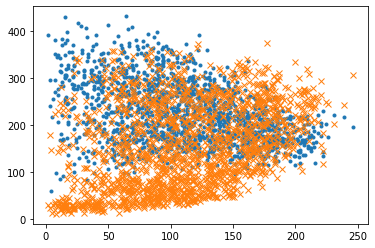

In [193]:
plt.plot(df_yel_gr_bike_rs['tripcnt'], df_yel_gr_bike_rs['tripcnt_taxi'], '.')
plt.plot(df_yel_gr_bike_rs['tripcnt'], df_yel_gr_bike_rs['tripcnt_rs'], 'x')

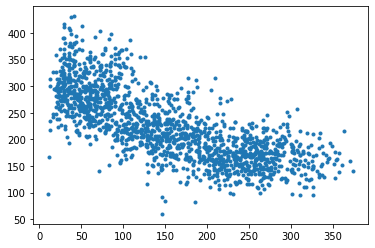

In [194]:
plt.plot(df_yel_gr_bike_rs['tripcnt_rs'], df_yel_gr_bike_rs['tripcnt_taxi'], '.')

In [195]:
cor_rs_taxi = df_yel_gr_bike_rs['tripcnt_rs'].corr(df_yel_gr_bike_rs['tripcnt_taxi'], 'pearson')
cor_rs_taxi

-0.7418430843695772

In [196]:
cor_rs_bike = df_yel_gr_bike_rs['tripcnt_rs'].corr(df_yel_gr_bike_rs['tripcnt'], 'pearson')
cor_rs_bike

0.3535458823004726

In [197]:
cor_taxi_bike = df_yel_gr_bike_rs['tripcnt'].corr(df_yel_gr_bike_rs['tripcnt_taxi'], 'pearson')
cor_taxi_bike

-0.3771783230279798

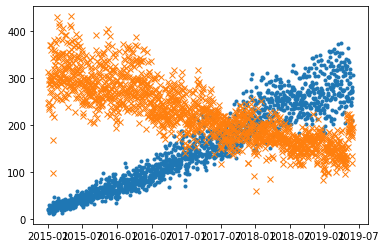

In [198]:
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt_rs'], '.')
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt_taxi'], 'x')

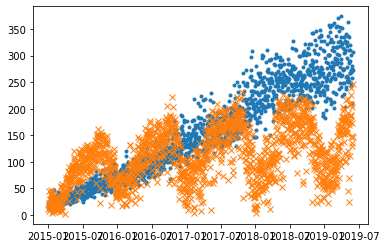

In [199]:
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt_rs'], '.')
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt'], 'x')

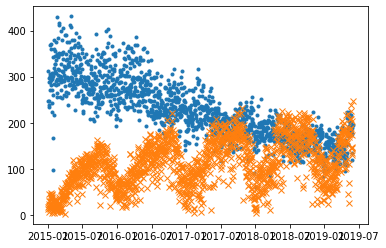

In [200]:
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt_taxi'], '.')
plt.plot(df_yel_gr_bike_rs.index, df_yel_gr_bike_rs['tripcnt'], 'x')

In [201]:
#now do linear wrt year and sin() wrt season

In [202]:
df_annual_bike = pd.DataFrame()
df_annual_bike['tripduration'] = resampled_df['tripduration'].resample('Y').mean()
df_annual_bike['birthyear'] = resampled_df['birthyear'].resample('Y').mean()
df_annual_bike['gender'] = resampled_df['gender'].resample('Y').mean() #mode()
df_annual_bike['usertype'] = resampled_df['usertype'].resample('Y').mean()
df_annual_bike['tripcnt'] = resampled_df['tripcnt'].resample('Y').sum()
df_annual_bike

,tripduration,birthyear,gender,usertype,tripcnt
date_minus_time,,,,,
2013-12-31,911.790112,1975.358712,1.017388,0.827274,15554
2014-12-31,1083.236825,1976.122025,1.119214,0.916092,22052
2015-12-31,1024.198835,1976.296544,1.084971,0.888571,28204
2016-12-31,928.493843,1977.626269,1.106624,0.898596,38554
2017-12-31,881.716362,1978.668267,1.123263,0.898982,44847
2018-12-31,912.336427,1978.938095,1.150865,0.902810,47894
2019-12-31,980.504913,1980.088963,1.161778,0.869771,52725


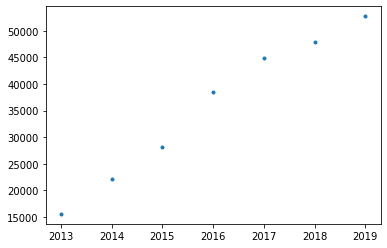

In [203]:
plt.plot(df_annual_bike.index.year, df_annual_bike['tripcnt'], '.')

In [204]:
from sklearn.linear_model import LinearRegression

In [205]:
reg = LinearRegression().fit((np.array(df_annual_bike.index.year) - 2013).reshape(-1, 1), df_annual_bike['tripcnt'])

In [206]:
print(reg.score((np.array(df_annual_bike.index.year) - 2013).reshape(-1, 1), df_annual_bike['tripcnt']))
print(reg.coef_)
print(reg.intercept_)

0.9799867826338655
[6422.85714286]
16421.428571428572


In [207]:
bike_oscillations = pd.DataFrame()
date_before = pd.Timestamp(2013, 1, 1)
bike_oscillations['tripcnt'] = resampled_df['tripcnt'] - (pd.to_datetime(resampled_df.index) - pd.to_datetime(date_before)).total_seconds() * reg.coef_[0] / 365 / 24 / 3600 / 365 
(pd.to_datetime(resampled_df.index) - pd.to_datetime(date_before)).total_seconds()  / 24 / 3600 /365

Float64Index([ 0.4136986301369863, 0.41643835616438357,  0.4191780821917808,
              0.42191780821917807,  0.4246575342465753,  0.4273972602739726,
               0.4301369863013699,  0.4328767123287671, 0.43561643835616437,
               0.4383561643835616,
              ...
                6.879452054794521,   6.882191780821918,   6.884931506849315,
                6.887671232876713,   6.890410958904109,  6.8931506849315065,
                6.895890410958904,   6.898630136986301,   6.901369863013699,
                6.904109589041096],
             dtype='float64', name='date_minus_time', length=2361)

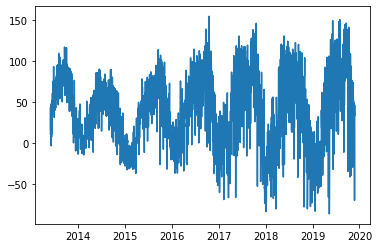

In [208]:
plt.plot(bike_oscillations.index, bike_oscillations['tripcnt'])

In [209]:
from scipy import optimize

In [219]:
def sine_wave(x, a, b, omega, phi, alpha):
    return a * np.exp(alpha * x) * np.sin(omega * x + phi) + b

In [220]:
x_data = (pd.to_datetime(resampled_df.index) - pd.to_datetime(date_before)).total_seconds()  / 24 / 3600 
y_data = bike_oscillations['tripcnt']

params, params_covariance = optimize.curve_fit(sine_wave, x_data, y_data,
                                               p0=[25, 20, 2 * np.pi / 365, 0, 1/500])

In [221]:
params, params_covariance

(array([-3.04790709e+01,  3.93139490e+01,  1.73679312e-02,  7.60995877e-01,
         2.58724231e-04]),
 array([[ 2.59659865e+00,  2.68731982e-02, -8.43730321e-07,
          2.05854295e-03,  4.65576784e-05],
        [ 2.68731982e-02,  4.12682341e-01,  4.87349800e-07,
         -3.75853728e-04, -1.30663914e-09],
        [-8.43730321e-07,  4.87349800e-07,  9.28944520e-10,
         -1.48021296e-06, -8.93503241e-12],
        [ 2.05854295e-03, -3.75853728e-04, -1.48021296e-06,
          2.76748447e-03,  2.95598016e-08],
        [ 4.65576784e-05, -1.30663914e-09, -8.93503241e-12,
          2.95598016e-08,  9.84744573e-10]]))

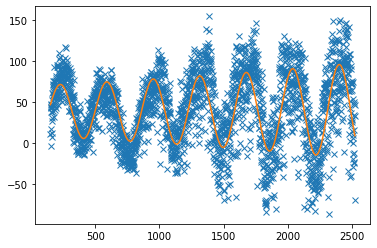

In [222]:
plt.plot(x_data, y_data, 'x')
plt.plot(x_data, sine_wave(x_data, params[0], params[1], params[2], params[3], params[4]),
         label='Fitted function A * sin(\omega * t + \phi)')